In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

In [2]:
X,y = make_moons(100,noise=0.25,random_state=2)

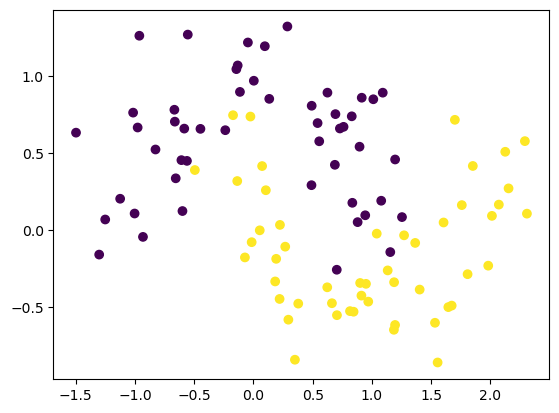

In [3]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [5]:
model = Sequential()

model.add(Dense(128,activation='relu',input_dim=2))
model.add(Dense(128,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [6]:
adam = Adam(learning_rate=0.01)
model.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'])
history1= model.fit(X,y,epochs=2000,validation_split=0.2,verbose=0)

9600/9600 [==============================] - 10s 1ms/step


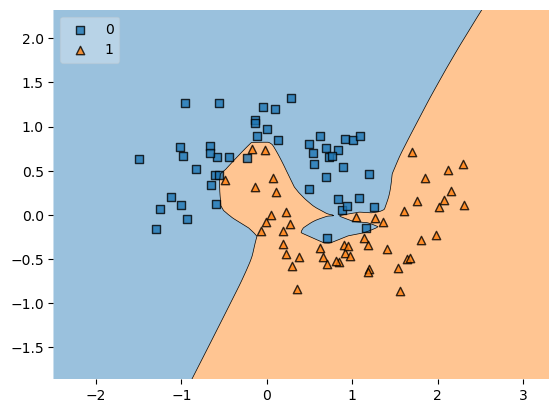

In [7]:
plot_decision_regions(X,y.astype('int'),clf=model,legend=2)
plt.show()

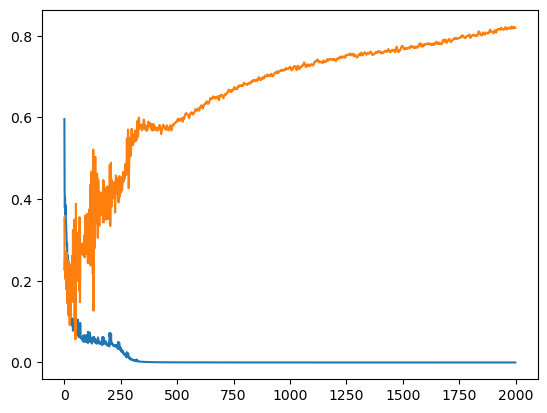

In [8]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])

## above data is overfitted

# using regularization to remove overfitting

In [10]:
model = Sequential()

model.add(Dense(128,input_dim=2,activation='relu',kernel_regularizer=tensorflow.keras.regularizers.l1(0.001)))
model.add(Dense(128,activation='relu',kernel_regularizer=tensorflow.keras.regularizers.l1(0.001)))
model.add(Dense(1,activation='sigmoid'))

In [11]:
adam = Adam(learning_rate=0.01)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history2 = model.fit(X, y, epochs=2000, validation_split = 0.2,verbose=0)

9600/9600 [==============================] - 10s 1ms/step


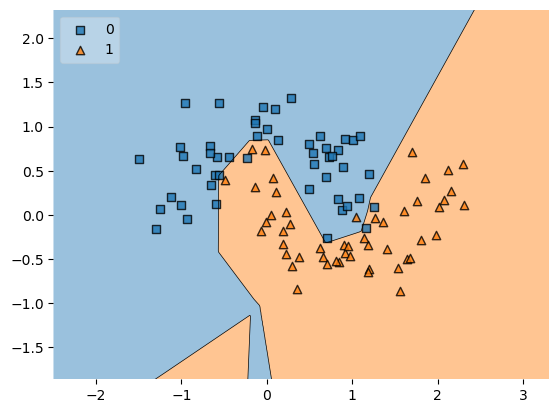

In [12]:
plot_decision_regions(X, y.astype('int'), clf=model, legend=2)
plt.show()

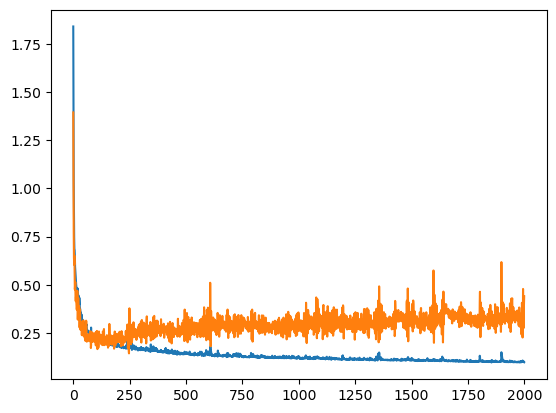

In [13]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])